In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
covid_data = pd.read_csv('20.csv')

In [3]:
covid_data

,Date,PA confirmed,RI confirmed,PA deaths,RI deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
433,2021-03-30,1020306,136419,25051,2613
434,2021-03-31,1024858,136419,25095,2613
435,2021-04-01,1028750,136419,25122,2613
436,2021-04-02,1033406,136419,25150,2613


In [4]:
covid_data.describe()

,PA confirmed,RI confirmed,PA deaths,RI deaths
count,4.380000e+02,438.000000,438.000000,438.000000
mean,2.917111e+05,39382.671233,9250.666667,1059.652968
std,3.343822e+05,41919.899696,7795.064192,776.665703
min,0.000000e+00,0.000000,0.000000,0.000000
25%,5.673300e+04,11315.750000,3692.750000,424.000000
50%,1.315735e+05,20580.000000,7645.000000,1020.000000
75%,5.069018e+05,62870.000000,12822.500000,1413.000000
max,1.038750e+06,138255.000000,25190.000000,2630.000000


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          438 non-null    object
 1   PA confirmed  438 non-null    int64 
 2   RI confirmed  438 non-null    int64 
 3   PA deaths     438 non-null    int64 
 4   RI deaths     438 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.2+ KB


In [6]:
covid_PA_confirmed = covid_data['PA confirmed']
covid_RI_confirmed = covid_data['RI confirmed']
covid_PA_deaths = covid_data['PA deaths']
covid_RI_deaths = covid_data['RI deaths']

In [7]:
print(covid_PA_confirmed.isnull().sum())
print(covid_RI_confirmed.isnull().sum())
print(covid_PA_deaths.isnull().sum())
print(covid_RI_deaths.isnull().sum())


0
0
0
0


In [8]:
covid_PA_confirmed = covid_PA_confirmed.diff()
covid_PA_confirmed.fillna(0, inplace=True)

covid_RI_confirmed = covid_RI_confirmed.diff()
covid_RI_confirmed.fillna(0, inplace=True)

covid_PA_deaths = covid_PA_deaths.diff()
covid_PA_deaths.fillna(0, inplace=True)

covid_RI_deaths = covid_RI_deaths.diff()
covid_RI_deaths.fillna(0, inplace=True)

In [9]:
aggregated_PA_confirmed = covid_PA_confirmed.sum()
aggregated_RI_confirmed = covid_RI_confirmed.sum()
aggregated_PA_deaths = covid_PA_deaths.sum()
aggregated_RI_deaths = covid_RI_deaths.sum()

In [10]:
#### Tukey's rule to check for outliers in the aggregated Confirmed and death cases dataset ####
### alpha is taken as 1.5 ###
def outlier_detection(df):
    n = df.size
    df = df.sort_values(ascending=True)
    q1 = df[int(np.ceil(0.25*n))]
    q3 = df[int(np.ceil(0.75*n))]
    iqr = q3 - q1
    
    
    alpha = 1.5
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    print(upper_limit,lower_limit)
    
    return df[((df < lower_limit) | (df > upper_limit))]

In [11]:
print(outlier_detection(covid_PA_confirmed))
print(outlier_detection(covid_RI_confirmed))
print(outlier_detection(covid_PA_deaths))
print(outlier_detection(covid_RI_deaths))

24306.5 -13713.5
Series([], Name: PA confirmed, dtype: float64)
20209.5 -11858.5
Series([], Name: RI confirmed, dtype: float64)
660.5 -359.5
Series([], Name: PA deaths, dtype: float64)
233.0 -127.0
Series([], Name: RI deaths, dtype: float64)


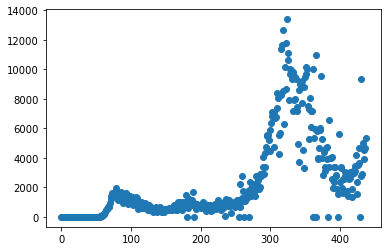

In [12]:
plt.scatter(x=np.arange(covid_PA_confirmed.size),y=covid_PA_confirmed)

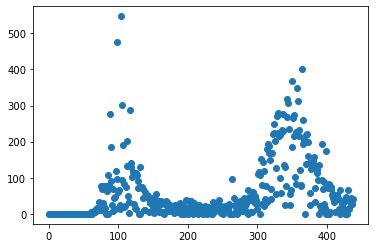

In [13]:
plt.scatter(x=np.arange(covid_PA_deaths.size),y=covid_PA_deaths)

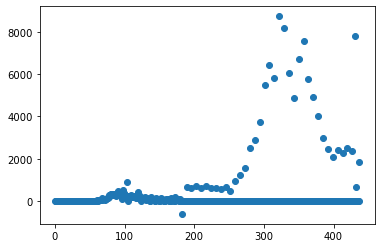

In [14]:
plt.scatter(x=np.arange(covid_RI_confirmed.size),y=covid_RI_confirmed)

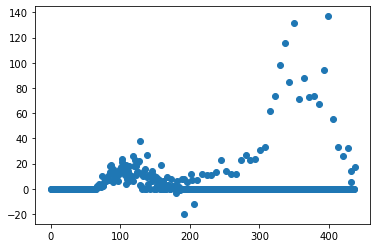

In [15]:
plt.scatter(x=np.arange(covid_RI_deaths.size),y=covid_RI_deaths)

In [16]:
covid_data

,Date,PA confirmed,RI confirmed,PA deaths,RI deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
433,2021-03-30,1020306,136419,25051,2613
434,2021-03-31,1024858,136419,25095,2613
435,2021-04-01,1028750,136419,25122,2613
436,2021-04-02,1033406,136419,25150,2613


In [17]:
# get feb and march data seperated
# covid_PA_confirmed = covid_data[['Date','PA confirmed']]
# covid_RI_confirmed = covid_data[['Date','RI confirmed']]
# covid_PA_deaths = covid_data[['Date','PA deaths']]
# covid_RI_deaths = covid_data[['Date','RI deaths']]

# covid_PA_confirmed['diff'] = covid_PA_confirmed['PA confirmed'].diff()
# covid_PA_confirmed['diff'].fillna(0, inplace=True)

# covid_RI_confirmed['diff'] = covid_RI_confirmed['RI confirmed'].diff()
# covid_RI_confirmed['diff'].fillna(0, inplace=True)

# covid_PA_deaths['diff'] = covid_PA_deaths['PA deaths'].diff()
# covid_PA_deaths['diff'].fillna(0, inplace=True)

# covid_RI_deaths['diff'] = covid_RI_deaths['RI deaths'].diff()
# covid_RI_deaths['diff'].fillna(0, inplace=True)

# 377 - 404 feb
# 404 - 
covid_PA_confirmed_feb21 = covid_PA_confirmed[377:404].to_numpy()
covid_RI_confirmed_feb21 = covid_RI_confirmed[377:404].to_numpy()
covid_PA_deaths_feb21 = covid_PA_deaths[377:404].to_numpy()
covid_RI_deaths_feb21 = covid_RI_deaths[377:404].to_numpy()

covid_PA_confirmed_mar21 = covid_PA_confirmed[404:435].to_numpy()
covid_RI_confirmed_mar21 = covid_RI_confirmed[404:435].to_numpy()
covid_PA_deaths_mar21 = covid_PA_deaths[404:435].to_numpy()
covid_RI_deaths_mar21 = covid_RI_deaths[404:435].to_numpy()
# print(covid_RI_deaths_mar21)

In [18]:
def corrected_variance(arr):
    square_sum = 0
    mean = np.mean(arr)
    n = len(arr)
    for i in range(n):
        square_sum = square_sum + (arr[i] -mean)*(arr[i]-mean)
    return square_sum/(n-1)

In [19]:
def walds_test_1sample(dist1,dist2, threshold, descr):
    
    dist1_mean = np.mean(dist1)
    dist2_mean = np.mean(dist2)

    numerator = dist2_mean - dist1_mean
    denominator = np.sqrt(dist2_mean/dist2.size)

    result = numerator/denominator
    w = np.abs(result)
    if(w>threshold):
      print("walds 1 sample testing for mean of "+str(descr)+" cases is w="+str(w) +" which is greater than z_alpha/2 = "+str(threshold)+" so reject the NULL hypothesis");
    else:
      print("walds 1 sample testing for mean of "+str(descr)+" cases is  w="+str(w)+ " which is less than z_alpha/2 = "+str(threshold)+" so accept the NULL hypothesis")

In [20]:
def walds_test_2sample(dist1, dist2, threshold, descr):

    dist1_mean = np.mean(dist1)
    dist2_mean = np.mean(dist2)
    
    numer = dist2_mean-dist1_mean
    denom = np.sqrt(dist2_mean/dist2.size + dist1_mean/dist1.size)
    w = abs(numer/denom)
    if(w>threshold):
      print("walds 2 sample testing for mean of "+str(descr)+" cases is w="+str(w) +" which is greater than z_alpha/2 = "+str(threshold)+" so reject the NULL hypothesis");
    else:
      print("walds 2 sample testing for mean of "+str(descr)+" cases is  w="+str(w)+ " which is less than z_alpha/2 = "+str(threshold)+" so accept the NULL hypothesis")

In [21]:
#  z test
def z_test(dist1, dist2, full, zthreshold, descr):
    dist1_mean = np.mean(dist1)
    dist2_mean = np.mean(dist2)
    
    numer = dist2_mean - dist1_mean
    denom = np.sqrt(corrected_variance(full)/full.size)
    
    z = abs(numer/denom)
    
    if(z>zthreshold):
      print("z test 1 sample testing for mean of "+str(descr)+" cases is w="+str(z) +" which is greater than z_alpha/2 = "+str(zthreshold)+" so reject the NULL hypothesis");
    else:
      print("z test 1 sample testing for mean of "+str(descr)+" cases is  w="+str(z)+ " which is less than z_alpha/2 = "+str(zthreshold)+" so accept the NULL hypothesis")

In [22]:
# t test
def t_test_1sample(dist1, dist2, tthreshold, descr):
    dist1_mean = np.mean(dist1)
    dist2_mean = np.mean(dist2)
    
    numer = dist2_mean - dist1_mean
    denom = np.sqrt(np.var(dist2)/dist2.size)
    
    t = abs(numer/denom)
    
    if(t>tthreshold):
      print("t test 1 sample testing for mean of "+str(descr)+" cases is w="+str(t) +" which is greater than t threshold = "+str(tthreshold)+" so reject the NULL hypothesis");
    else:
      print("t test 1 sample testing for mean of "+str(descr)+" cases is  w="+str(t)+ " which is less than t thresfold = "+str(tthreshold)+" so accept the NULL hypothesis")


In [23]:
# t test
def t_test_2sample_unpaired(dist1, dist2,  tthreshold, descr):
    dist1_mean = np.mean(dist1)
    dist2_mean = np.mean(dist2)
    
    numer = dist2_mean - dist1_mean
    denom = np.sqrt(np.var(dist2)/dist2.size + np.var(dist1)/dist1.size)
    
    t = abs(numer/denom)
    
    if(t>tthreshold):
      print("t test 2 sample testing for mean of "+str(descr)+" cases is w="+str(t) +" which is greater than t threshold = "+str(tthreshold)+" so reject the NULL hypothesis");
    else:
      print("t test 2 sample testing for mean of "+str(descr)+" cases is  w="+str(t)+ " which is less than t thresfold = "+str(tthreshold)+" so accept the NULL hypothesis")


In [24]:
# walds 1 cases
walds_test_1sample(covid_PA_confirmed_feb21, covid_PA_confirmed_mar21, 1.962, "PA confirmed")
walds_test_1sample(covid_RI_confirmed_feb21, covid_RI_confirmed_mar21, 1.962, "RI confirmed")

walds_test_1sample(covid_PA_deaths_feb21, covid_PA_deaths_mar21, 1.962, "PA death")
walds_test_1sample(covid_RI_deaths_feb21, covid_RI_deaths_mar21, 1.962, "RI death")

walds 1 sample testing for mean of PA confirmed cases is w=16.619607923824383 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
walds 1 sample testing for mean of RI confirmed cases is w=35.67665229676999 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
walds 1 sample testing for mean of PA death cases is w=49.264056266219804 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
walds 1 sample testing for mean of RI death cases is w=20.405322325300368 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis


In [25]:
# z test cases
z_test(covid_PA_confirmed_feb21, covid_PA_confirmed_mar21, covid_PA_confirmed.to_numpy(), 1.962, "PA confirmed")
z_test(covid_RI_confirmed_feb21, covid_RI_confirmed_mar21, covid_RI_confirmed.to_numpy(), 1.962, "RI confirmed")

z_test(covid_PA_deaths_feb21, covid_PA_deaths_mar21, covid_PA_deaths.to_numpy(), 1.962, "PA death")
z_test(covid_RI_deaths_feb21, covid_RI_deaths_mar21, covid_RI_deaths.to_numpy(), 1.962, "RI death")


z test 1 sample testing for mean of PA confirmed cases is  w=1.1882866194558868 which is less than z_alpha/2 = 1.962 so accept the NULL hypothesis
z test 1 sample testing for mean of RI confirmed cases is w=2.7806084019373296 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
z test 1 sample testing for mean of PA death cases is w=13.442637032881342 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
z test 1 sample testing for mean of RI death cases is w=10.469384943619318 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis


In [26]:
# t test 1 sample cases
t_test_1sample(covid_PA_confirmed_feb21, covid_PA_confirmed_mar21, 1.695, "PA confirmed")
t_test_1sample(covid_RI_confirmed_feb21, covid_RI_confirmed_mar21, 1.695, "RI confirmed")

t_test_1sample(covid_PA_deaths_feb21, covid_PA_deaths_mar21, 1.695, "PA death")
t_test_1sample(covid_RI_deaths_feb21, covid_RI_deaths_mar21, 1.695, "RI death")

t test 1 sample testing for mean of PA confirmed cases is  w=0.5911709914592703 which is less than t thresfold = 1.695 so accept the NULL hypothesis
t test 1 sample testing for mean of RI confirmed cases is  w=0.5581406153509247 which is less than t thresfold = 1.695 so accept the NULL hypothesis
t test 1 sample testing for mean of PA death cases is w=14.080850914346481 which is greater than t threshold = 1.695 so reject the NULL hypothesis
t test 1 sample testing for mean of RI death cases is w=3.650029496242308 which is greater than t threshold = 1.695 so reject the NULL hypothesis


In [27]:
# walds 2 sample cases
walds_test_2sample(covid_PA_confirmed_feb21, covid_PA_confirmed_mar21, 1.962, "PA confirmed")
walds_test_2sample(covid_RI_confirmed_feb21, covid_RI_confirmed_mar21, 1.962, "RI confirmed")

walds_test_2sample(covid_PA_deaths_feb21, covid_PA_deaths_mar21, 1.962, "PA death")
walds_test_2sample(covid_RI_deaths_feb21, covid_RI_deaths_mar21, 1.962, "RI death")

walds 2 sample testing for mean of PA confirmed cases is w=11.177901973153707 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
walds 2 sample testing for mean of RI confirmed cases is w=26.281060780115222 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
walds 2 sample testing for mean of PA death cases is w=25.021307796226584 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis
walds 2 sample testing for mean of RI death cases is w=10.238505691170836 which is greater than z_alpha/2 = 1.962 so reject the NULL hypothesis


In [28]:
# t test 1 sample cases
t_test_2sample_unpaired(covid_PA_confirmed_feb21, covid_PA_confirmed_mar21, 1.672, "PA confirmed")
t_test_2sample_unpaired(covid_RI_confirmed_feb21, covid_RI_confirmed_mar21, 1.672, "RI confirmed")

t_test_2sample_unpaired(covid_PA_deaths_feb21, covid_PA_deaths_mar21, 1.672, "PA death")
t_test_2sample_unpaired(covid_RI_deaths_feb21, covid_RI_deaths_mar21, 1.672, "RI death")

t test 2 sample testing for mean of PA confirmed cases is  w=0.4174693674380703 which is less than t thresfold = 1.672 so accept the NULL hypothesis
t test 2 sample testing for mean of RI confirmed cases is  w=0.4491787322092176 which is less than t thresfold = 1.672 so accept the NULL hypothesis
t test 2 sample testing for mean of PA death cases is w=4.533964533784396 which is greater than t threshold = 1.672 so reject the NULL hypothesis
t test 2 sample testing for mean of RI death cases is  w=1.1972817568022474 which is less than t thresfold = 1.672 so accept the NULL hypothesis


**Applicability Of Tests:**

**Wald's Test:**
   1. We require an asymptomatical normal estimator for wald's test and as n = 28, 30 is fairly low, this is not the ideal case       for assumption of CLT for sample mean. Therefore, this test is not applicable.

   2. The above reasoning works well for 2 sample test as well, since we need both estimators to be asymptomatically Normal.           Therfore this test is also not applicable.

**Z-test:**

   1. As we need to use true standard deviation in z-test , the dataset size is just 438, which is not particularly large.             Neither the  datasets are normally distributed. Therefore this testis not applicable.

**T-test:**

   1. For one sample , similarly to above tests, the data inferred here is neither normally distributed nor large enough.             Therefore the test is not applicable.
   2. For unpaired 2 sample test, distributions need to be independent and normally distributed. But that doesnt seem the same         in above case. Therefore the test is not applicable.